<a href="https://colab.research.google.com/github/dovahkiin0022/dummy_group_repository/blob/data-visualization/group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/hw5-iron-alloy-preprocessed.csv',index_col=0)

In [3]:
def parse_range(value):
    """Cleans up two problems with this DataFrame:
    (1) NaN values should be 0 for compositions
    (2) Ranges with scalars separated by "to"
    """
    try:
        return float(value)
    except:
        pass
    if type(value) is str and 'to' in value:
        lo, hi = [float(it) for it in value.split('to')]
        return float(0.5 * (lo + hi))

def cleanup_column(column):
    try:
        return column.astype(float)
    except:
        pass
    return [parse_range(it) for it in column.values]

# for column in df.columns:
#     column = cleanup_column(df.iloc[:, 1])

In [4]:
for columns in df.columns:
    if df[columns].dtypes == object:
        try:
            c = cleanup_column(df[columns])
            df[columns] = c
        except:
            pass

In [5]:
def find_missing_values(df):
  missing_values = df.isnull().sum() / len(df)
  missing_values = missing_values[missing_values > 0]
  missing_values.sort_values(inplace=True)
  missing_values = pd.DataFrame(missing_values)
  missing_values.columns = ['count']
  missing_values.index.names = ['Name']
  return missing_values

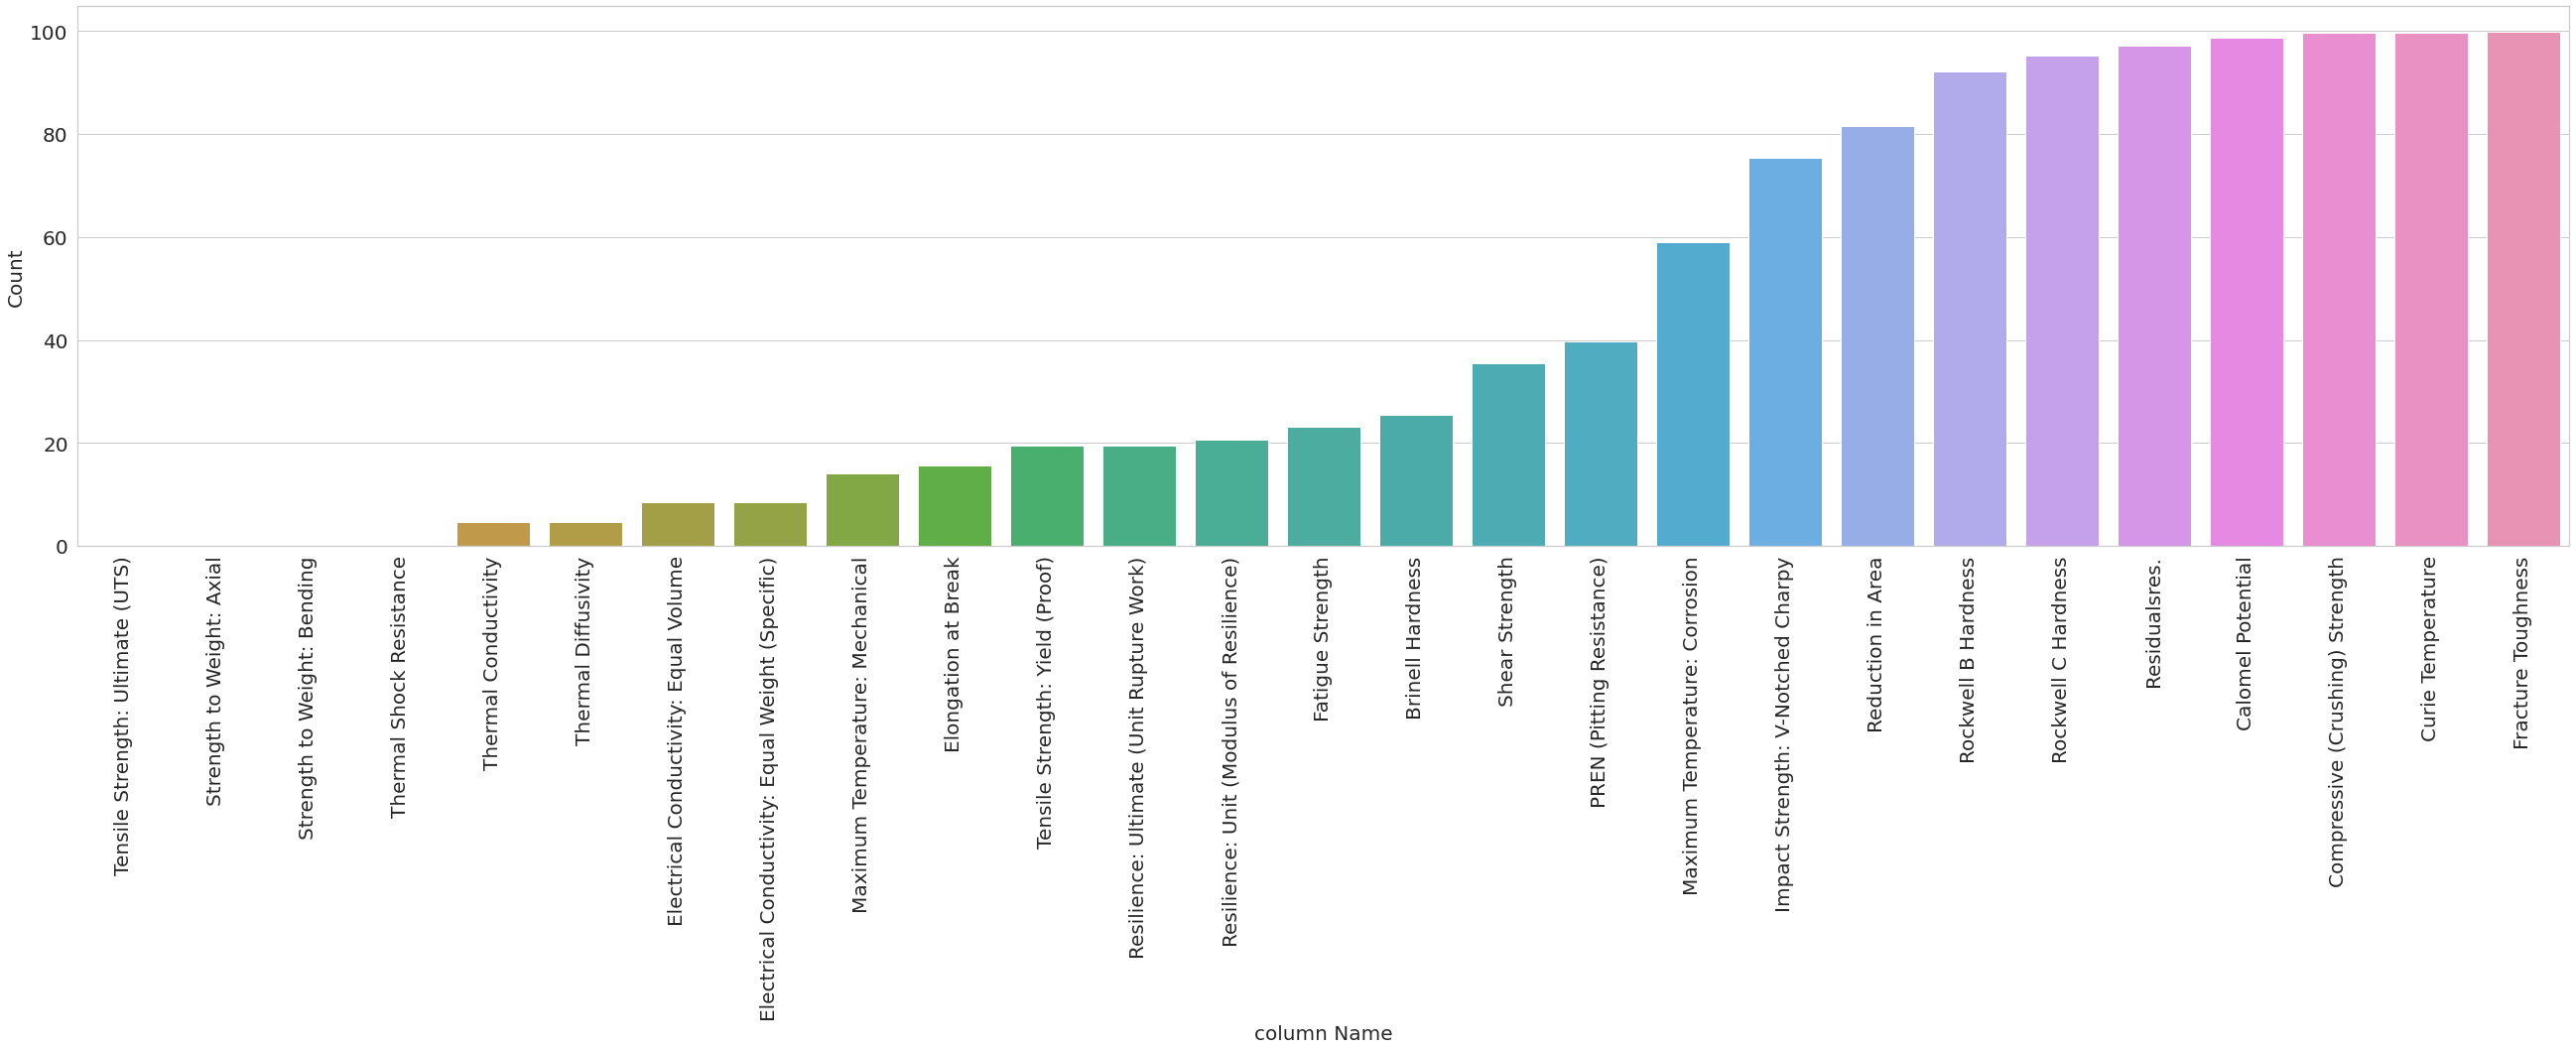

In [6]:
missing_values=find_missing_values(df)
#plot percentage of missing values for each columns
import seaborn as sns
plt.figure(figsize=(45,10))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = missing_values.index, y = 'count', data=missing_values*100)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('column Name', fontsize=20)
plt.show()

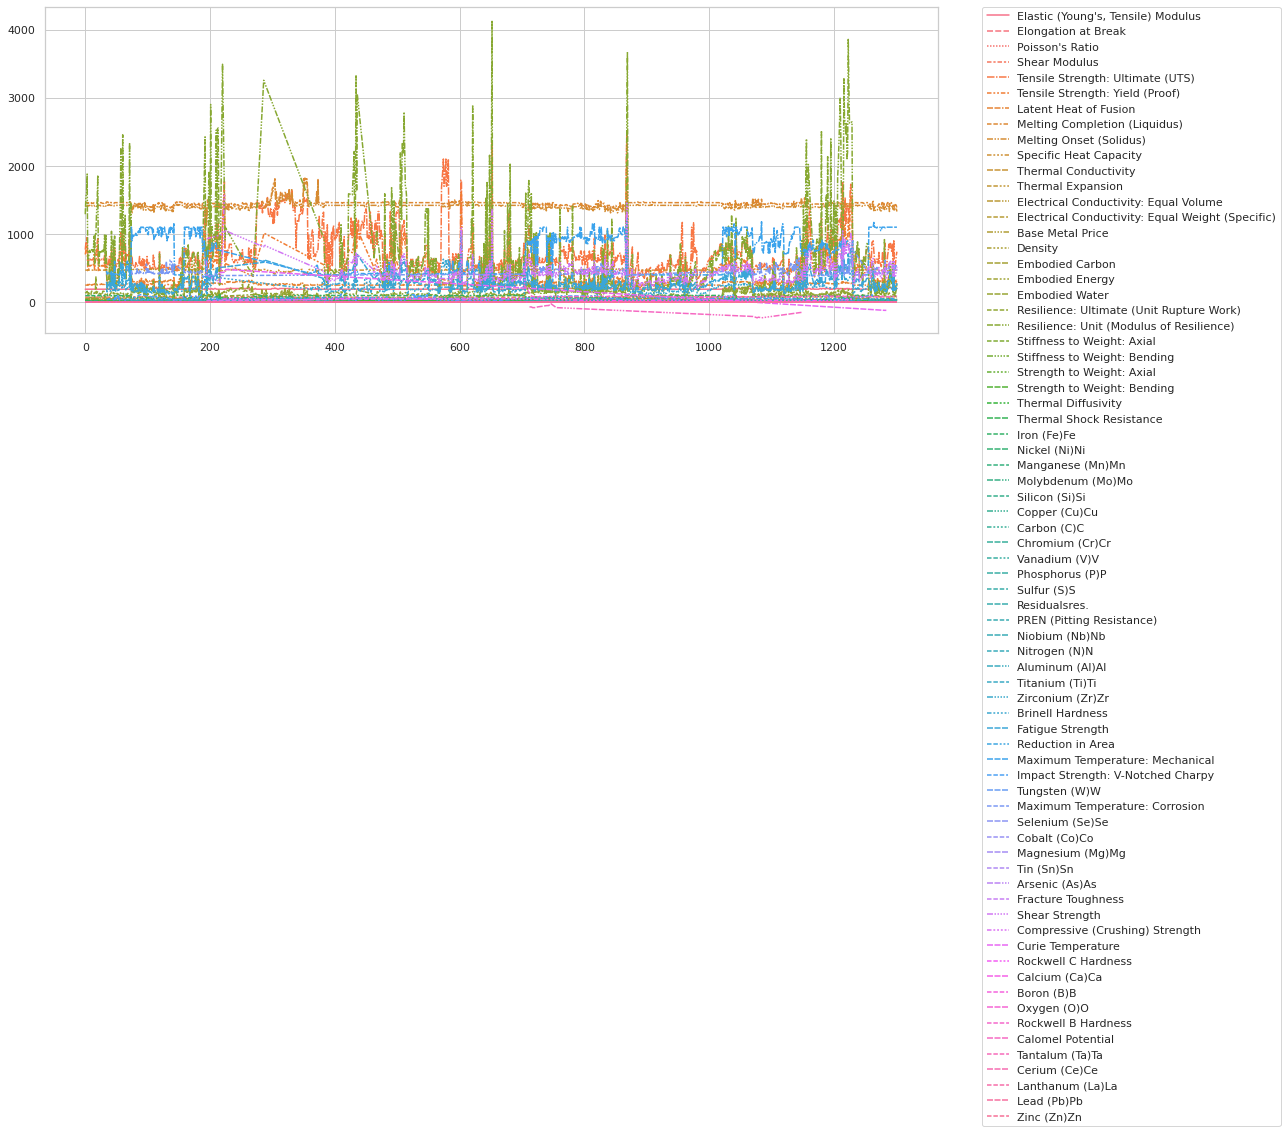

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

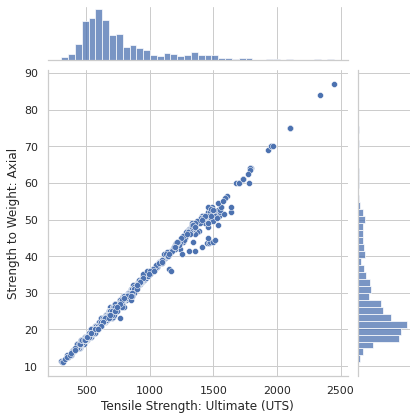

In [8]:
sns.jointplot(x=df['Tensile Strength: Ultimate (UTS)'], y=df['Strength to Weight: Axial']) #exploring outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

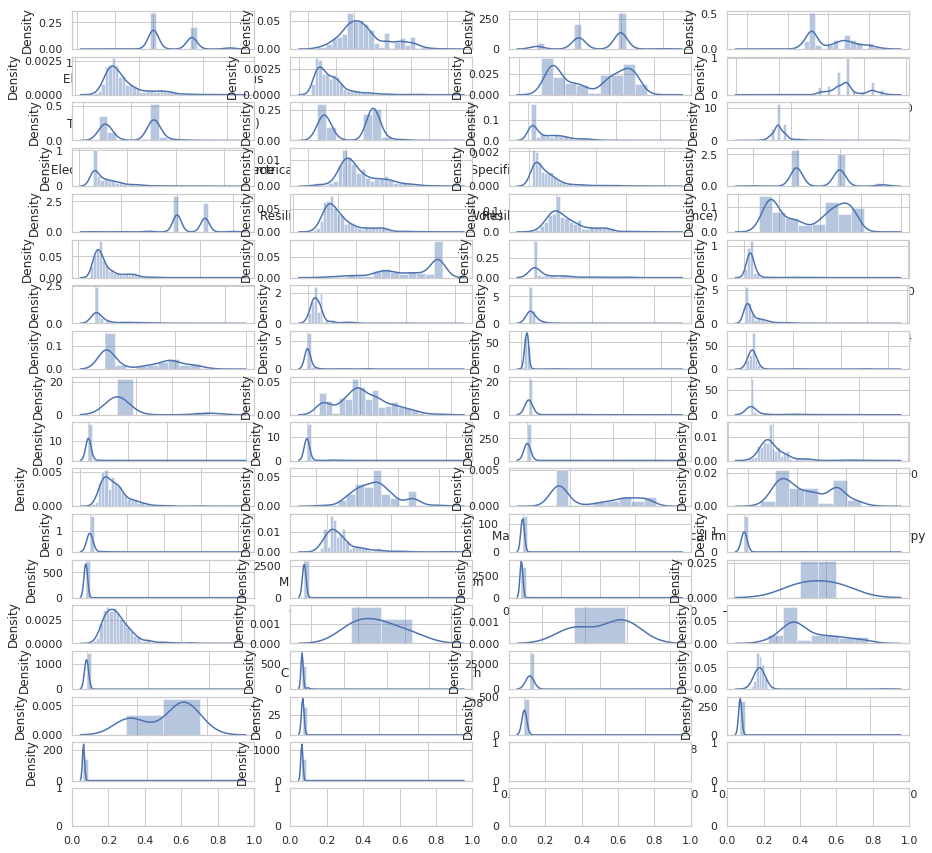

In [9]:
import matplotlib.pyplot as plt
# Create the subplots
fig, axes = plt.subplots(18,4,figsize=(10,10))
fig.set_size_inches(15, 15)

n_cols=4
for i, column in enumerate(df.select_dtypes(include=[np.float])):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols])

In [10]:
df.skew()
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Elastic (Young's, Tensile) Modulus      -0.212637
Elongation at Break                      0.025998
Poisson's Ratio                         -0.351006
Shear Modulus                           -0.840902
Tensile Strength: Ultimate (UTS)         2.959957
                                         ...     
Tantalum (Ta)Ta                        636.708002
Cerium (Ce)Ce                          145.257026
Lanthanum (La)La                       451.855633
Lead (Pb)Pb                           1301.478558
Zinc (Zn)Zn                           1302.000000
Length: 72, dtype: float64

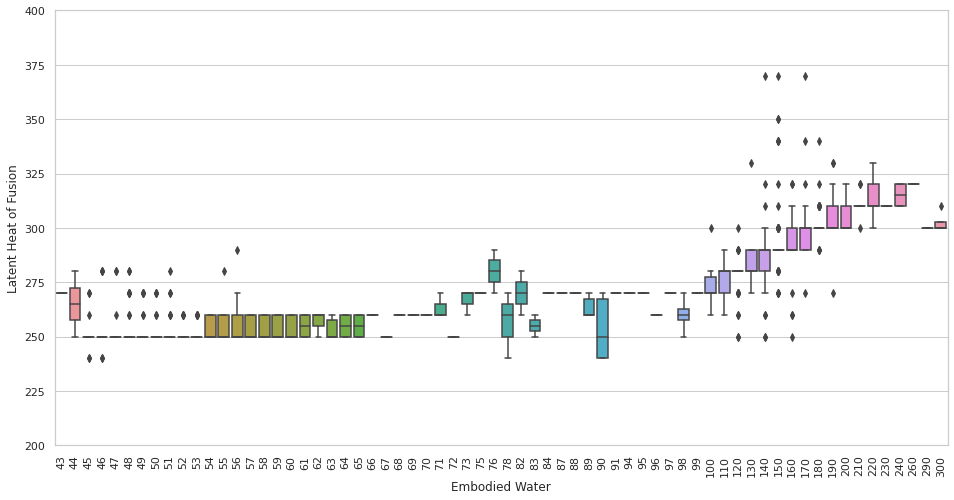

In [11]:
var = 'Embodied Water'
data = pd.concat([df['Latent Heat of Fusion'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Latent Heat of Fusion", data=data)
fig.axis(ymin=200, ymax=400);
plt.xticks(rotation=90);

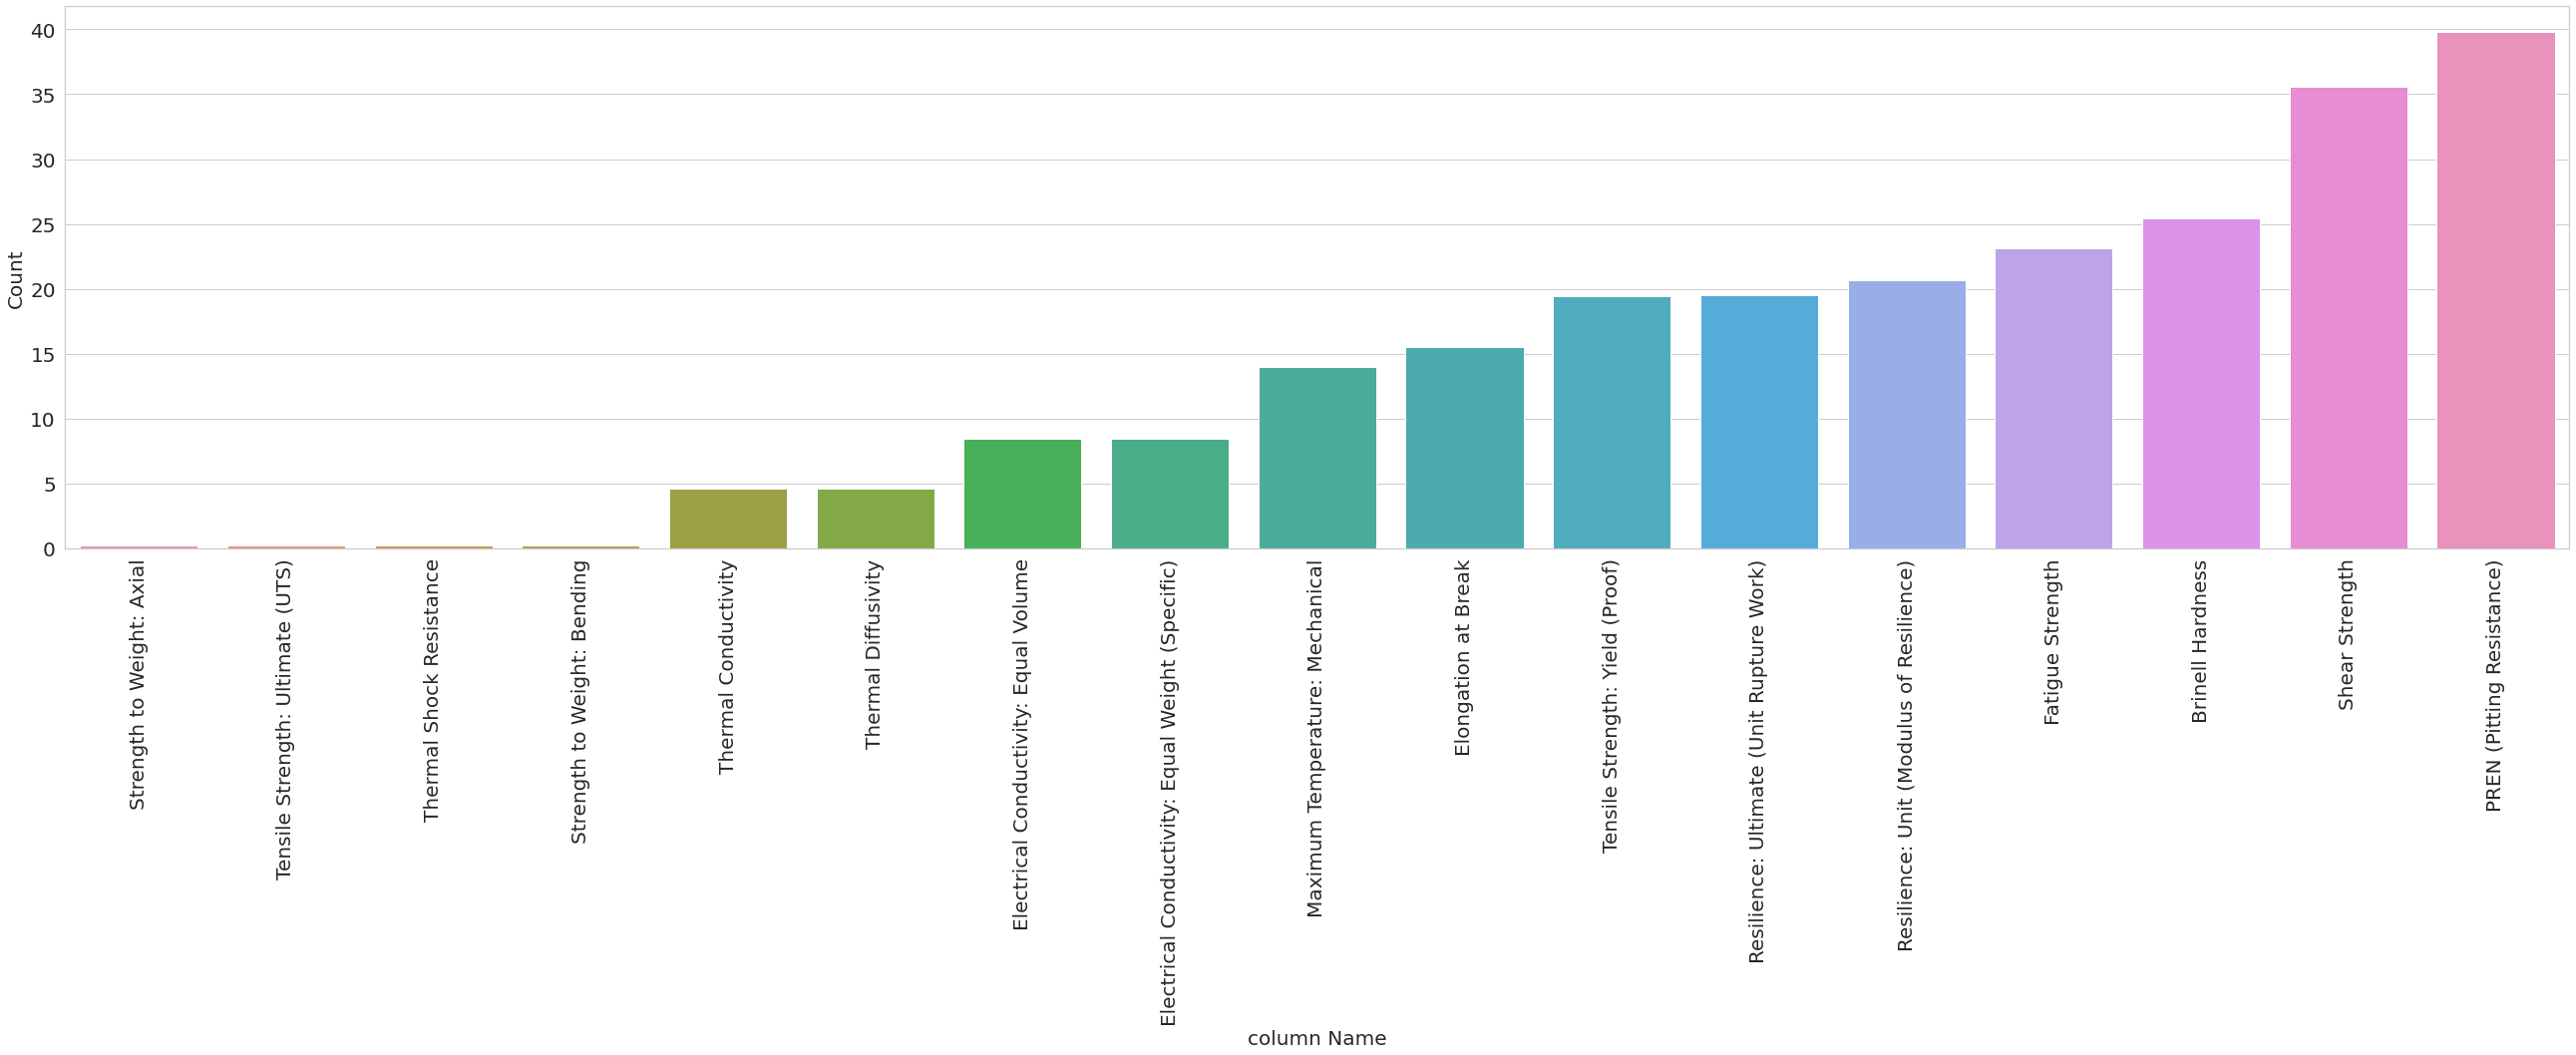

In [12]:
df=df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)
#plot percentage of missing values for each columns

#plot percentage of missing values for each columns
import seaborn as sns
plt.figure(figsize=(45,10))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = find_missing_values(df).index, y = 'count', data=find_missing_values(df)*100)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('column Name', fontsize=20)
plt.show()

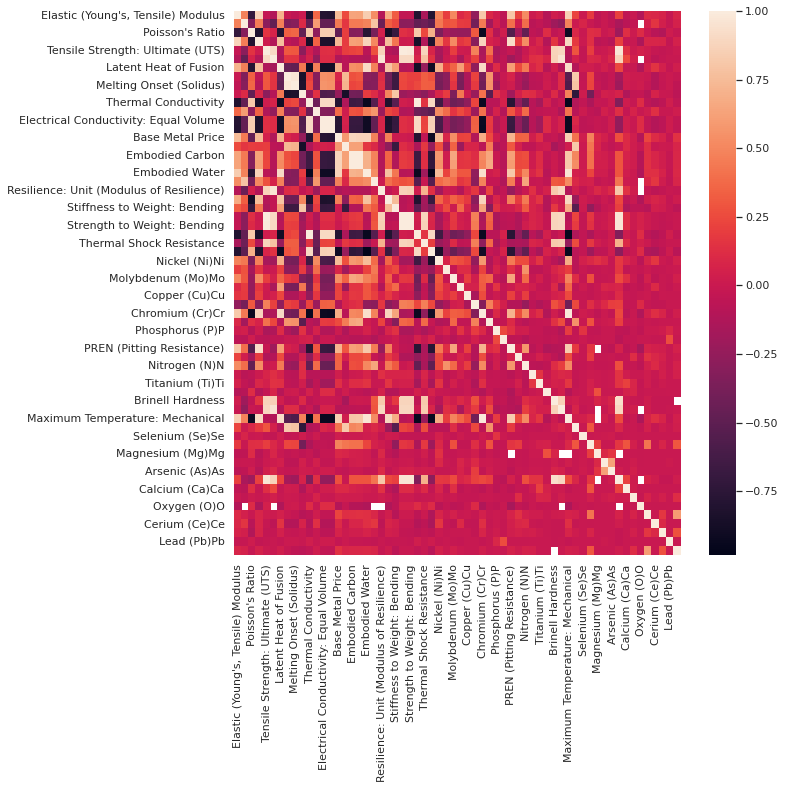

In [13]:
#coorelation heatmap
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

In [14]:
print (corr['Tensile Strength: Ultimate (UTS)'].sort_values(ascending=True)[:10]) #top 10 correlations
print (corr['Tensile Strength: Ultimate (UTS)'].sort_values(ascending=False)[-5:]) #least 5 correlations

Elongation at Break            -0.286473
Specific Heat Capacity         -0.278504
Nickel (Ni)Ni                  -0.158028
Chromium (Cr)Cr                -0.149307
Phosphorus (P)P                -0.142470
Stiffness to Weight: Bending   -0.134244
Thermal Expansion              -0.122263
Latent Heat of Fusion          -0.119629
Niobium (Nb)Nb                 -0.114867
Stiffness to Weight: Axial     -0.105880
Name: Tensile Strength: Ultimate (UTS), dtype: float64
Phosphorus (P)P          -0.142470
Chromium (Cr)Cr          -0.149307
Nickel (Ni)Ni            -0.158028
Specific Heat Capacity   -0.278504
Elongation at Break      -0.286473
Name: Tensile Strength: Ultimate (UTS), dtype: float64


In [22]:
columns=df.columns
df[columns] = df[columns].fillna(df[columns].mode().iloc[0])



```
#Imputation by random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
cols = [0]
df.drop(df.columns[cols],axis=1,inplace=True)

imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(df.iloc[:,:])
```




In [27]:
df

,Elongation at Break,Poisson's Ratio,Shear Modulus,Tensile Strength: Ultimate (UTS),Tensile Strength: Yield (Proof),Latent Heat of Fusion,Melting Completion (Liquidus),Melting Onset (Solidus),Specific Heat Capacity,Thermal Conductivity,...,Arsenic (As)As,Shear Strength,Calcium (Ca)Ca,Boron (B)B,Oxygen (O)O,Tantalum (Ta)Ta,Cerium (Ce)Ce,Lanthanum (La)La,Lead (Pb)Pb,Zinc (Zn)Zn
0,18.0,0.29,73.0,770.0,700.0,250,1460,1410,470,48.0,...,0.0,400.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,17.0,0.29,73.0,870.0,760.0,250,1460,1410,470,48.0,...,0.0,400.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,17.0,0.29,73.0,850.0,780.0,250,1460,1410,470,41.0,...,0.0,400.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,17.0,0.29,73.0,950.0,840.0,250,1460,1410,470,41.0,...,0.0,400.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4,21.0,0.29,73.0,580.0,460.0,260,1460,1420,470,39.0,...,0.0,400.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,39.0,0.28,78.0,540.0,190.0,310,1390,1340,480,12.0,...,0.0,370.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1298,39.0,0.28,78.0,540.0,230.0,300,1430,1380,470,12.0,...,0.0,370.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1299,34.0,0.28,79.0,590.0,230.0,320,1430,1380,470,15.0,...,0.0,390.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1300,34.0,0.28,78.0,690.0,310.0,300,1420,1370,470,14.0,...,0.0,460.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)